# Ch1. Linear Regression

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# 환자에게 X를 1000회 투약
N = 1000
idx = np.arange(0, N)
# X1 = torch.zeros(N,1)
X = 10*torch.randn(N,1)
# X = torch.cat([X1, X2], axis=1)
print(X)
Noise = 2*torch.randn(N,1)
# print(X.shape, Noise.shape)

tensor([[-2.8163e+00],
        [-3.0969e-01],
        [-2.5793e+00],
        [-7.6522e+00],
        [-1.2651e+01],
        [-1.2492e+01],
        [-6.1580e+00],
        [ 6.6901e+00],
        [-5.2460e-01],
        [-4.5535e+00],
        [-5.7780e+00],
        [-7.8124e+00],
        [ 1.4323e+01],
        [-1.9699e+00],
        [ 1.2560e+01],
        [-1.2955e+01],
        [ 8.8163e-01],
        [ 2.4681e+01],
        [ 5.3813e-01],
        [-1.2012e+01],
        [ 7.6514e+00],
        [-3.7843e+00],
        [ 1.5345e+01],
        [ 7.6197e+00],
        [-4.6089e+00],
        [-5.0369e+00],
        [ 1.5269e+01],
        [-6.1518e+00],
        [ 3.9913e+00],
        [-5.1828e+00],
        [-5.5835e+00],
        [ 1.6679e+00],
        [-2.6806e+00],
        [ 6.9255e+00],
        [ 5.3738e+00],
        [-9.4669e+00],
        [ 1.5340e+01],
        [-1.0395e+01],
        [-1.6457e+00],
        [-3.1414e+00],
        [-3.9817e+00],
        [ 5.7201e+00],
        [ 1.0807e+01],
        [ 9

(0.0, 1000.0, -50.0, 50.0)

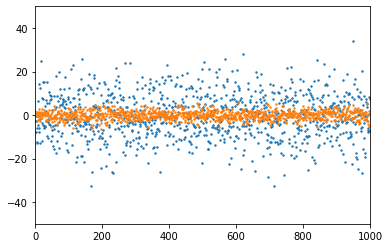

In [3]:
plt.scatter(idx, X, s=2)
plt.scatter(idx, Noise, s=2)
plt.axis([0, N, -50, 50])

In [4]:
# 환자의 혈액검사에서 Y를 측정
# Y = 2 * ((X+noise)**2) + 3 # 2 * (X+Noise) + 3
Y = 2 * (X + Noise) + 3
print(Y.shape)

torch.Size([1000, 1])


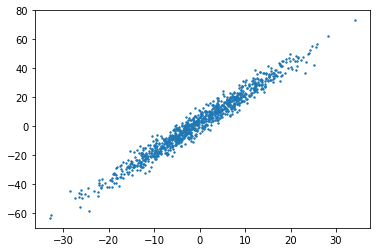

In [5]:
# X 약물에 대한 환자 혈액의 Y 사이에 상관관계
plt.scatter(X, Y, s=2)

In [6]:
linear_w = torch.randn(2, requires_grad=True)
print(linear_w)

import torch.nn as nn
model = nn.Linear(1,1)
model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

tensor([-0.5869, -0.4376], requires_grad=True)


In [7]:
X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)
print(Y_pred.shape)

torch.Size([1000, 1])


In [8]:
out = model(X)
print(out.shape)

torch.Size([1000, 1])


In [9]:
print(Y_pred[0:5,:])
print(out[0:5,:])

tensor([[ 1.2154],
        [-0.2558],
        [ 1.0762],
        [ 4.0536],
        [ 6.9872]], grad_fn=<SliceBackward>)
tensor([[ 1.2154],
        [-0.2558],
        [ 1.0762],
        [ 4.0536],
        [ 6.9872]], grad_fn=<SliceBackward>)


In [10]:
print(linear_w.grad.data)

AttributeError: 'NoneType' object has no attribute 'data'

tensor([-0.0579,  2.5579])
[tensor([[-0.0579]]), tensor([[2.5579]])]


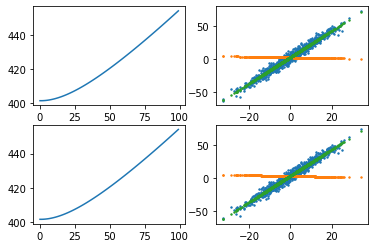

In [12]:
linear_w = torch.randn(2, requires_grad=True)
# print(linear_w)
X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)

import torch.nn as nn
model = nn.Linear(1,1)
model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

# print(torch.cat([Y, Y_pred, Y-Y_pred],1))


gamma = 0.0097
num_epoc = 100

losses1 = []
for epoc in range(num_epoc):
    linear_w.grad = None
    Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)
    loss1 = torch.mean((Y - Y_pred)**2)
    loss1.backward()
    # print(linear_w.data)
    linear_w.data = linear_w.data - gamma * linear_w.grad.data
    # print(linear_w.grad.data, gamma, linear_w.data)
    losses1.append(loss1.item())
    
plt.subplot(2,2,1)
plt.plot(losses1)
print(linear_w.data)

plt.subplot(2,2,2)
Y_pred1 = torch.mv(X_linear, linear_w).unsqueeze(1)
plt.scatter(X, Y, s=2)
plt.scatter(X, Y_pred1.detach(), s=2)
Y_true = 2 * (X) + 3
plt.scatter(X, Y_true, s=2)

# linear_w = torch.randn(2, requires_grad=True)
# # print(linear_w)
# X_linear = torch.cat([X, torch.ones(N,1)], axis=1)
# Y_pred = torch.mv(X_linear, linear_w).unsqueeze(1)

# import torch.nn as nn
# model = nn.Linear(1,1)
# model.weight.data = linear_w[0].unsqueeze(0).unsqueeze(0)
# model.bias.data = linear_w[1].unsqueeze(0).unsqueeze(0)

# import torch.nn as nn
import torch.optim as optim

losses2 = []
# loss_func = nn.L1Loss()
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=gamma)
for i in range(num_epoc):
    optimizer.zero_grad()
    output = model(X)
    # print(output.shape, Y.shape)
    loss = loss_func(output, Y)
    loss.backward()
    optimizer.step()
    losses2.append(loss.item())
    
plt.subplot(2,2,3)
plt.plot(losses2)
print([model.weight.data, model.bias.data])

plt.subplot(2,2,4)
output1 = model(X)
plt.scatter(X, Y, s=2)
plt.scatter(X, output1.detach(), s=2)
Y_true = 2 * (X) + 3
plt.scatter(X, Y_true, s=2)